In [ ]:
import numpy as np
from urllib import request
import gzip



In [ ]:
filename = [
["x_train", "train-images-idx3-ubyte.gz"],
["x_test", "t10k-images-idx3-ubyte.gz"],
["y_train", "train-labels-idx1-ubyte.gz"],
["y_test", "t10k-labels-idx1-ubyte.gz" ],
]

base_url = "http://yann.lecun.com/exdb/mnist/" 
for n in filename:
    request.urlretrieve(base_url+n[1],n[1])
    print("%s downloaded " % base_url+n[1])

print("download has been completed.")

http://yann.lecun.com/exdb/mnist/ downloaded train-images-idx3-ubyte.gz
http://yann.lecun.com/exdb/mnist/ downloaded t10k-images-idx3-ubyte.gz
http://yann.lecun.com/exdb/mnist/ downloaded train-labels-idx1-ubyte.gz
http://yann.lecun.com/exdb/mnist/ downloaded t10k-labels-idx1-ubyte.gz
download has been completed.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/3wEZBBXsscJsZi97PQpa6ph_W5TmmfOzFvVXI_gN4iXl9GctXEZRsVE
Mounted at /content/drive


In [ ]:
mnist = {}

for name in filename[:2]:
    with gzip.open(name[1], 'rb') as f:
        mnist[name[0]] = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1,28,28)
        
for name in filename[2:]:
    with gzip.open(name[1], 'rb') as f:
        mnist[name[0]] = np.frombuffer(f.read(),np.uint8, offset=8).reshape(-1,1)

In [ ]:
print(mnist['x_train'].shape)
print(mnist['y_train'].shape)


(60000, 28, 28)
(60000, 1)


In [ ]:
print(mnist['x_test'].shape)
print(mnist['y_test'].shape)

(10000, 28, 28)
(10000, 1)


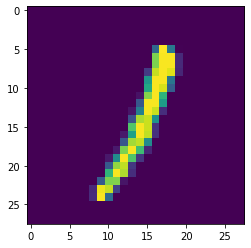

In [ ]:
import matplotlib.pyplot as plt

img = mnist['x_train'][99,:]
plt.imshow(img)
plt.show()

In [ ]:
print(mnist['y_train'][99])

[1]


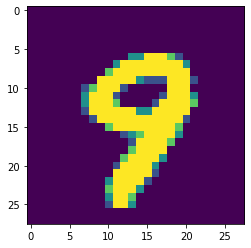

In [ ]:
img = mnist['x_train'][5999,:]
plt.imshow(img)
plt.show()

In [ ]:
print(mnist['y_train'][5999])

[9]


In [ ]:
x_train, y_train, x_test, y_test = mnist['x_train'], mnist['y_train'], mnist['x_test'], mnist['y_test']

## 연습문제 1

In [ ]:
def draw_10_images(i):
    images = x_train[i:i+10]
  for i in range(10):
    plt.subplot(2,5,i+1)
    draw_10_images(i)
    plt.imshow(images)
    plt.show()

IndentationError: ignored

TypeError: ignored

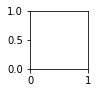

In [75]:
for i in range(10):
 plt.subplot(2, 5, i+1)
 images = x_train[i:i+10]
 plt.imshow(images)
 plt.show()

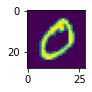

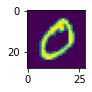

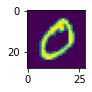

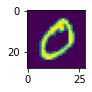

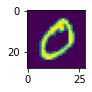

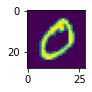

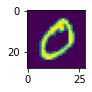

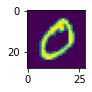

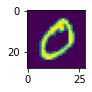

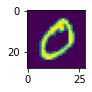

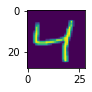

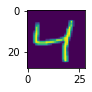

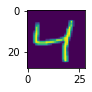

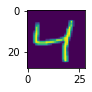

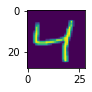

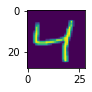

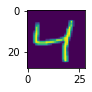

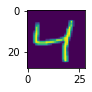

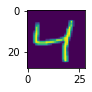

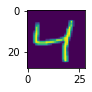

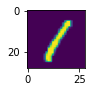

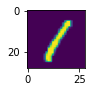

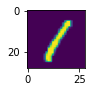

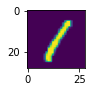

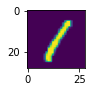

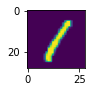

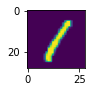

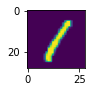

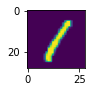

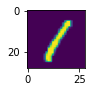

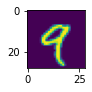

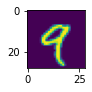

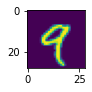

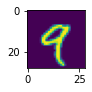

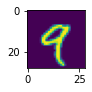

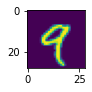

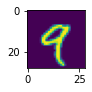

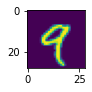

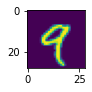

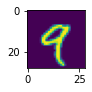

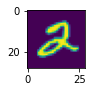

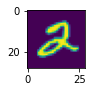

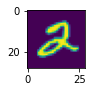

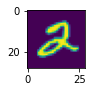

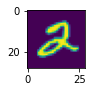

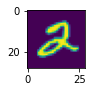

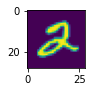

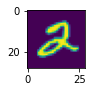

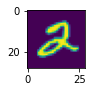

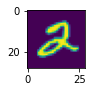

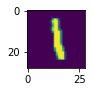

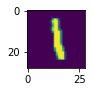

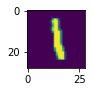

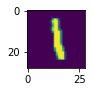

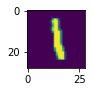

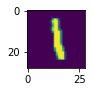

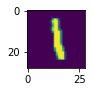

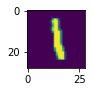

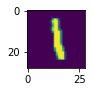

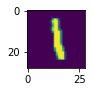

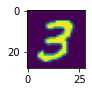

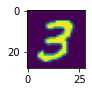

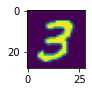

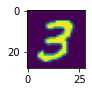

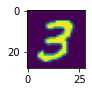

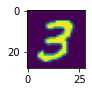

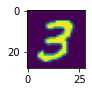

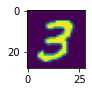

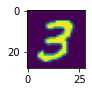

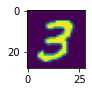

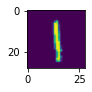

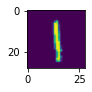

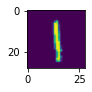

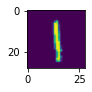

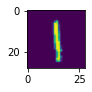

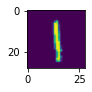

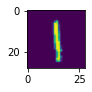

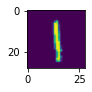

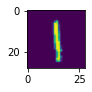

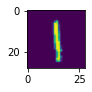

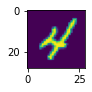

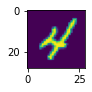

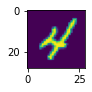

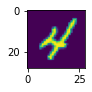

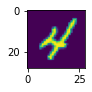

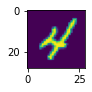

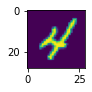

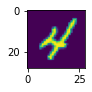

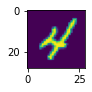

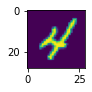

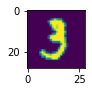

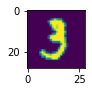

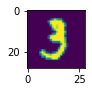

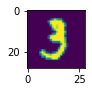

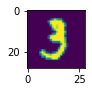

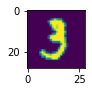

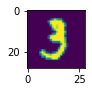

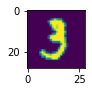

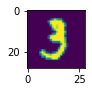

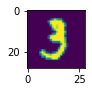

In [69]:
def draw_10_images(i):
    images = x_train[i:i+10]   
    for n in images:
      for m in range(10): 
       plt.subplot(2, 5, m+1)
       plt.imshow(n)
       plt.show()

draw_10_images(1)

## 연습문제 2

In [ ]:
# 연습문제 2. x_train 에서 각각의 0, 1, 2, ..., 9 각각의 데이터셋은 몇개씩이나 있을까요?

# your code here 




# (hint) numpy 의 condition operator 를 지난 자료에서 알려드렸습니다. 
# y_train == 8

## 연습문제 3

In [ ]:
# 연습문제 3. 0~9 까지를 분류하는 multi-class classification 은 pytorch 를 이용해서 매우 손쉽게 풀어볼 예정이구요. 학습을 위해서 0,1 숫자 두개는 특별히 분류해서 numpy 를 이용해서 직접 logistic regression 을 돌려볼려고 합니다. 0,1 만 존재하는 x_train, y_train, x_test, y_test 를 만들어 보도록 합시다. 

# Hint
a = np.random.random(100)
a = a.reshape(100,1)   # rank-1 row array 에서 column array 로 변환
print(a)
mask = a < 0.4  #  a array 에서 0.4 보다 작은 원소만 뽑아서 mask array 를 만듬
print(mask)

c = a[mask].reshape(-1,1)  # rank-1 row array 에서 column array 로 변환
print(c.shape, len(c))
print(c)

# 위의 예제를 보시면 y_train 에서 0,1 을 뽑는 것 가능하겠죠?  y_train 에서 얻은 mask 를 이용해서 x_train 을 얻는 것은 조금 복잡합니다 :)


[[0.21411375]
 [0.02518935]
 [0.32994285]
 [0.02653014]
 [0.6737544 ]
 [0.32800305]
 [0.54296667]
 [0.16027074]
 [0.06107593]
 [0.81641139]
 [0.01854319]
 [0.11462284]
 [0.64763636]
 [0.12530118]
 [0.12220712]
 [0.3452979 ]
 [0.56871181]
 [0.60742596]
 [0.8171467 ]
 [0.86926231]
 [0.56319711]
 [0.73083901]
 [0.56649898]
 [0.69567368]
 [0.05421544]
 [0.19068877]
 [0.1632634 ]
 [0.58533055]
 [0.15741547]
 [0.01052484]
 [0.18457648]
 [0.0943109 ]
 [0.55473435]
 [0.68947651]
 [0.01847706]
 [0.7988389 ]
 [0.13370398]
 [0.01350241]
 [0.66925282]
 [0.30870411]
 [0.50332244]
 [0.96619999]
 [0.9199809 ]
 [0.5300935 ]
 [0.6880382 ]
 [0.5313223 ]
 [0.85228049]
 [0.25134804]
 [0.8025836 ]
 [0.43372761]
 [0.97413418]
 [0.57114445]
 [0.84114432]
 [0.82130066]
 [0.01836732]
 [0.26582588]
 [0.46676393]
 [0.84505835]
 [0.68242215]
 [0.69970906]
 [0.29196424]
 [0.77452916]
 [0.83349344]
 [0.99390476]
 [0.05992665]
 [0.53294322]
 [0.22754944]
 [0.27710251]
 [0.15966563]
 [0.11465109]
 [0.45248623]
 [0.63